In [6]:
import math

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
def is_odd(n):
    return n % 2


def ball_volume(n: int, r: float):
    
    if is_odd(n):
        h = (n - 1) // 2
        
        return (2 ** n) * (math.pi ** h) * (r ** n) * math.factorial(h) / math.factorial(n)
    
    h = n // 2
    
    return (math.pi ** h) * (r ** n) / math.factorial(h)


def percent_taken(n: int, crust_percent: float):
    whole_volume = ball_volume(n, r=1)
    pulp_volume = ball_volume(n, r=1-crust_percent)
    
    return 100 * (whole_volume - pulp_volume) / whole_volume

In [177]:
CRUST_PERCENT = 0.15

CRUST_COLOR = "#2FAC4E"
PULP_COLOR = "#FA6B74"

In [178]:
y = np.array(["Мякоть"] * 100)
line = np.linspace(-1, 1, 100)

border = int(CRUST_PERCENT * 100 // 2)

y[: border] = "Корка"
y[-border: ] = "Корка"

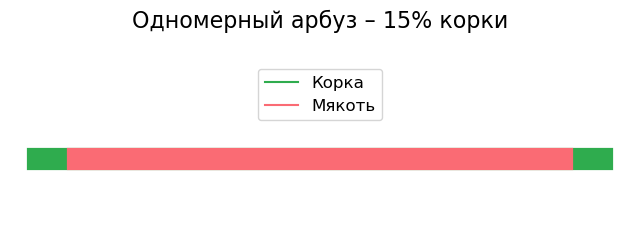

In [179]:
plt.figure(figsize=(8, 2), dpi=100)

sns.lineplot(x=line, y=np.zeros_like(line), hue=y, lw=16, palette=[CRUST_COLOR, PULP_COLOR])
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fontsize=12)
plt.title(f"Одномерный арбуз – {int(percent_taken(1, CRUST_PERCENT))}% корки", pad=40, fontsize=16)
plt.axis("off");

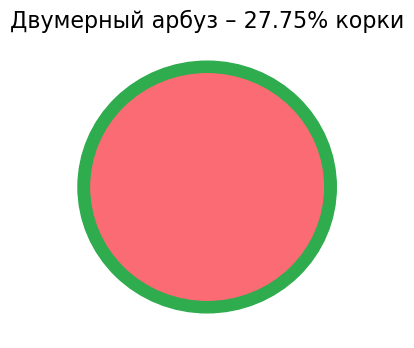

In [183]:
crust = plt.Circle((0, 0), 1, color=CRUST_COLOR)
pulp = plt.Circle((0, 0), 0.9, color=PULP_COLOR)

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)

ax.add_patch(crust)
ax.add_patch(pulp)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

plt.axis("off")
plt.title(f"Двумерный арбуз – {round(percent_taken(2, CRUST_PERCENT), 2)}% корки", fontsize=16);

In [227]:
ns = np.arange(1, 31)
volumes = [percent_taken(n, CRUST_PERCENT) for n in ns]
pulp_volumes = [100 - percent_taken(n, CRUST_PERCENT) for n in ns]

Text(0, 0.5, 'Доля корки от объёма арбуза, %')

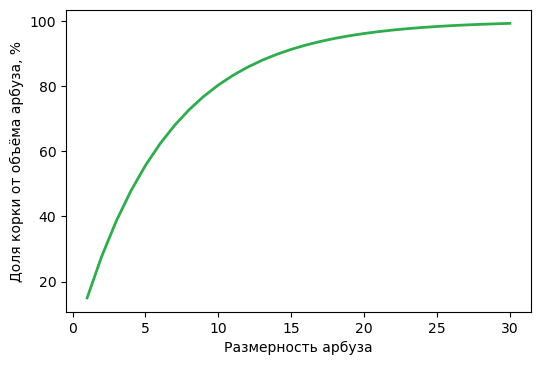

In [228]:
plt.figure(figsize=(6, 4), dpi=100)

plt.plot(ns, volumes, c=CRUST_COLOR, lw=2)
# plt.plot(ns, pulp_volumes, c=PULP_COLOR, lw=2)
plt.xlabel("Размерность арбуза")
plt.ylabel("Доля корки от объёма арбуза, %")

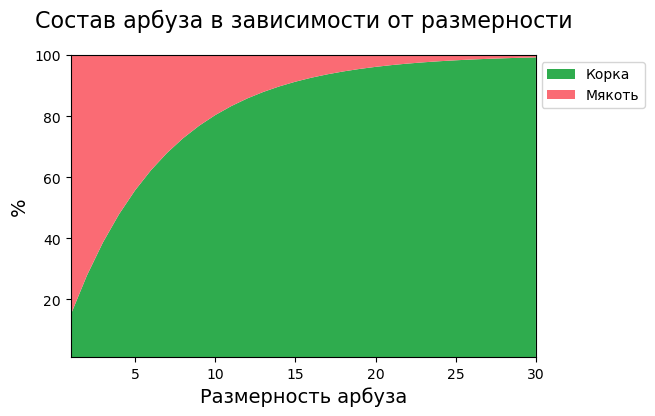

In [229]:
plt.figure(figsize=(6, 4), dpi=100)

plt.stackplot(ns, [volumes, pulp_volumes], labels=["Корка", "Мякоть"], colors=[CRUST_COLOR, PULP_COLOR])
plt.legend(bbox_to_anchor=(1.25, 1))
plt.xlim(1, ns[-1])
plt.ylim(1, 100)

plt.xlabel("Размерность арбуза", fontsize=14)
plt.ylabel("%", fontsize=14)
plt.title("Состав арбуза в зависимости от размерности", fontsize=16, pad=20);

In [237]:
print("n", "% корки", sep="\t")
print("-" * 15)

for n, v in zip(ns, volumes):
    print(n, round(v, 4), sep="\t")

n	% корки
---------------
1	15.0
2	27.75
3	38.5875
4	47.7994
5	55.6295
6	62.285
7	67.9423
8	72.7509
9	76.8383
10	80.3126
11	83.2657
12	85.7758
13	87.9095
14	89.723
15	91.2646
16	92.5749
17	93.6887
18	94.6354
19	95.4401
20	96.124
21	96.7054
22	97.1996
23	97.6197
24	97.9767
25	98.2802
26	98.5382
27	98.7575
28	98.9438
29	99.1023
30	99.2369


In [241]:
print("n", "объём", sep="\t")
print("-" * 30)

for n in ns:
    print(n, ball_volume(n, r=1), sep="\t")

n	объём
------------------------------
1	2.0
2	3.141592653589793
3	4.1887902047863905
4	4.934802200544679
5	5.263789013914324
6	5.167712780049969
7	4.724765970331401
8	4.058712126416768
9	3.298508902738706
10	2.550164039877345
11	1.8841038793899
12	1.3352627688545893
13	0.910628754783283
14	0.5992645293207919
15	0.3814432808233044
16	0.23533063035889312
17	0.14098110691713897
18	0.08214588661112819
19	0.04662160103008853
20	0.02580689139001405
21	0.013949150409020995
22	0.007370430945714348
23	0.003810656386852123
24	0.001929574309403922
25	0.0009577224088231724
26	0.00046630280576761234
27	0.00022287212472127402
28	0.00010463810492484565
29	4.828782273891742e-05
30	2.1915353447830204e-05
